In [1]:
%run -i 'visual_model_selection.py'

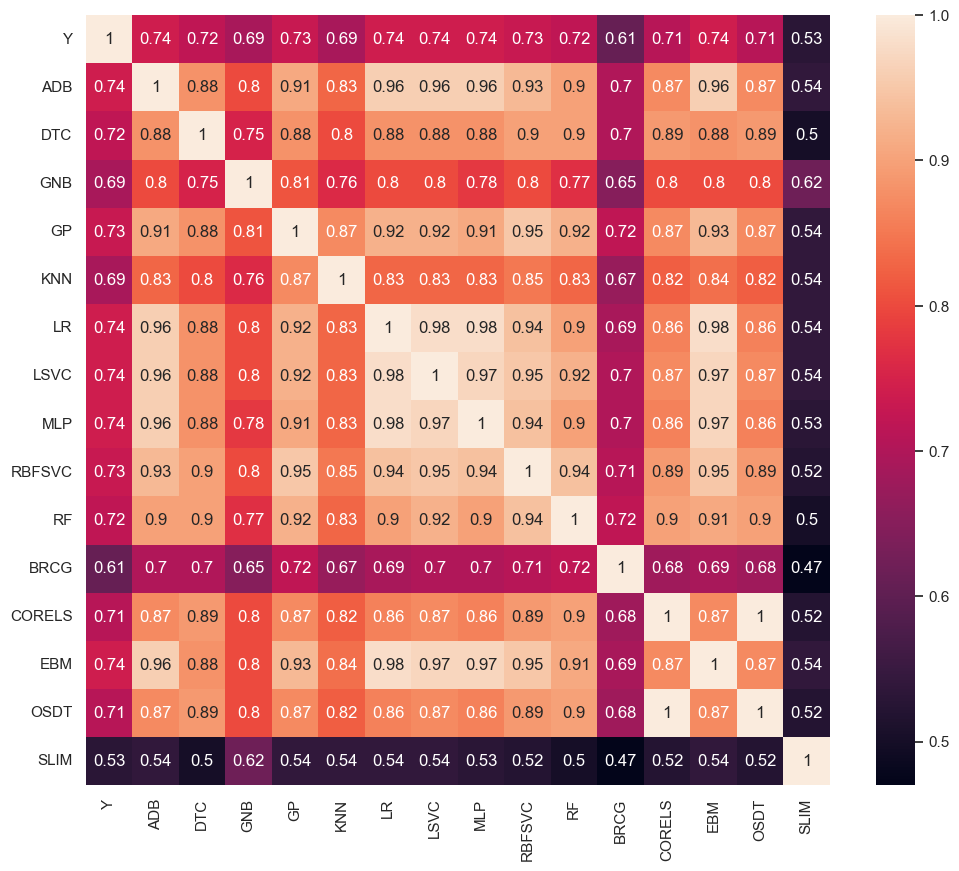

In [2]:
"""
    Figure 3 in the paper performing pairwise comparison from a heatmap of model prediction agreement level.
    
    Parameters
    ----------
    Y_list : a list of tuples that consists of model names and model predictions. The first tuple contains the true labels, while the subsequent tuples contain model predictions.
    decimal: decimal of numbers shown in the heatmap
    export_file: option to save the current figure
    filename: file name to be specified to save the current figure
""" 
df=pd.read_csv('FICO_binary_testlabel_and_prediction.csv')

Y_list=[]
for i in range(df.shape[1]):
    model_name=df.columns[i]
    predictions=df[model_name].to_numpy()
    Y=model_name, predictions
    Y_list.append(Y)

MC_heatmap_of_prediction(Y_list, decimal=2, figsize=(12,10), export_file=True, filename='MC_heatmap_of_prediction.png', dpi=300)


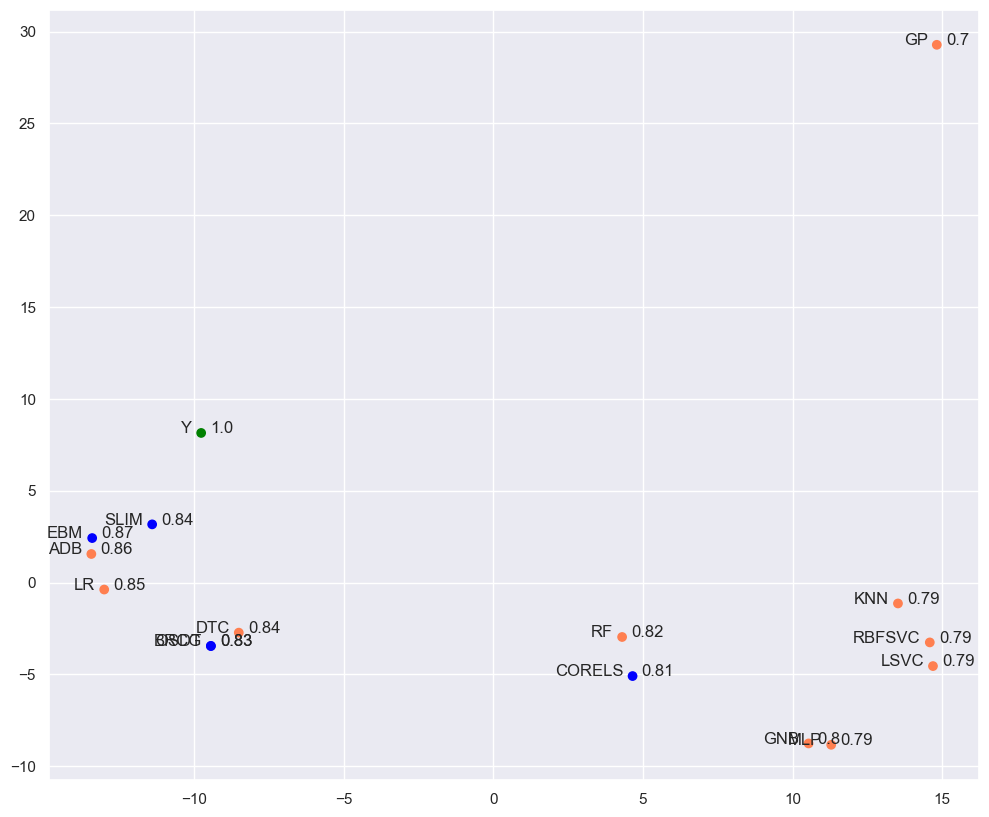

In [3]:
"""
    Figure 9 in the paper performing pairwise comparison via plotting PCA dimensionality reduction on model predictions
    Models locate close to each other have similar predictions
    Next to model names are prediction accuracies
    
    Parameters
    ----------
    Y_list : a list of tuples that consists of model names, model predictions, and test accuracies
    color_indices: a list of indices for the colors
    colors: a list of colors
    export_file: option to save the current figure
    filename: file name to be specified to save the current figure
"""
df=pd.read_csv('Adult_testdata_and_prediction.csv')
df = df.iloc[:, -16:]

Y_list=[]
for i in range(df.shape[1]):
        model_name=df.columns[i]
        predictions=df[model_name].to_numpy()
        acc = sum(df.iloc[:,0]==df.iloc[:,i])/(df.shape[0])
        Y=model_name, predictions, round(acc,2)
        Y_list.append(Y)

color_indices = [0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2]
colors = ['green','coral','blue']  

MC_scatterplot_prediction(Y_list, color_indices=color_indices, colors=colors, figsize=(12,10), 
                          export_file=True, filename='MC_scatterplot_prediction.png', alpha=1, dpi=300)

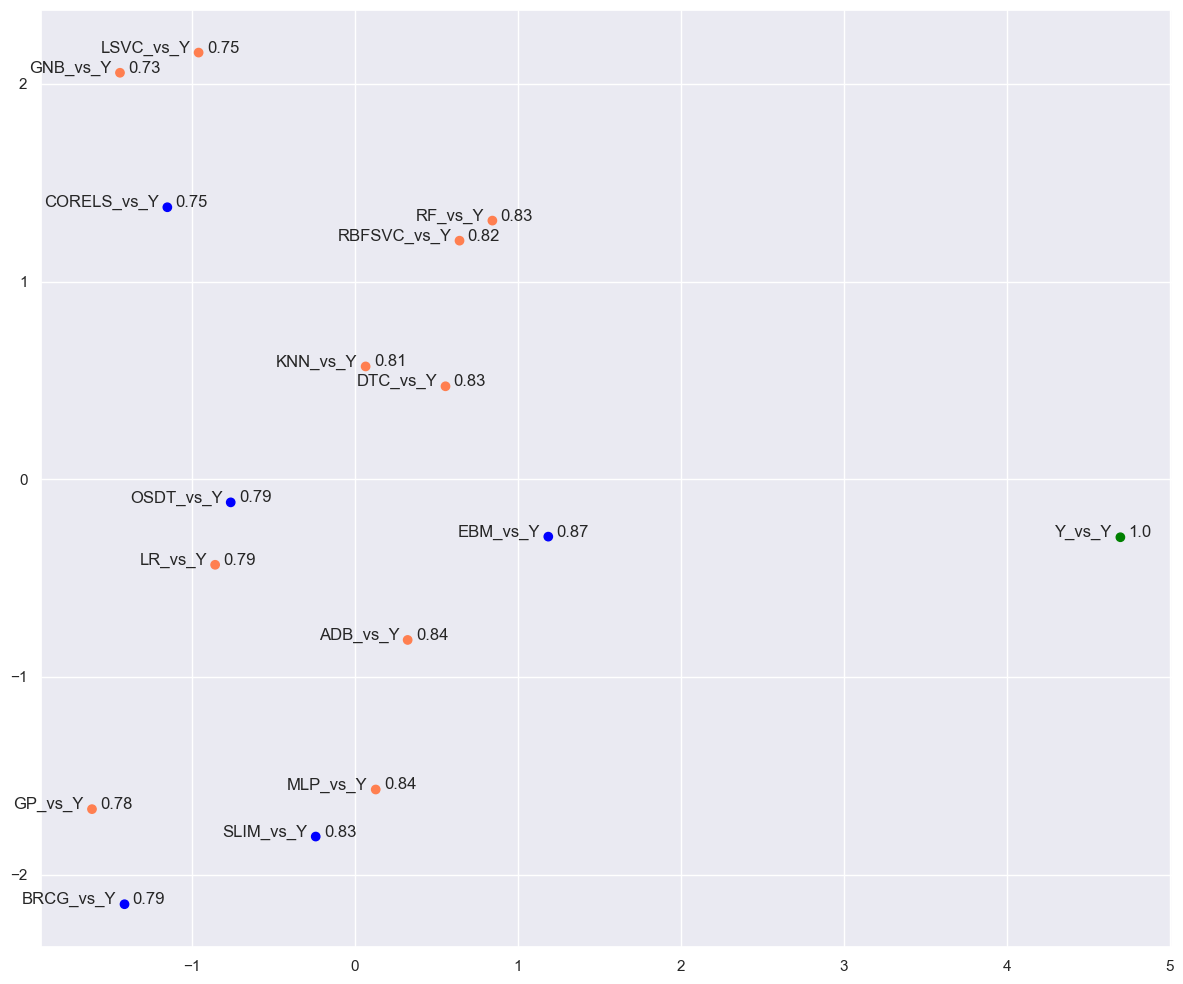

In [4]:
"""
    Figure 30 in the paper performing pairwise comparison via plotting PCA dimensionality reduction on models' confusion matrices
    Models locate close to each other have similar confusion matrices
    Next to confusion matrices names are model prediction accuracies
    
    Parameters
    ----------
    Y_list : a list of tuples that consists of model names, model predictions, and test accuracies. The first tuple contains the true labels, while the subsequent tuples contain model predictions.
    color_indices: a list of indices for the colors
    colors: a list of colors
    export_file: option to save the current figure
    filename: file name to be specified to save the current figure
"""

df=pd.read_csv('Magic_testdata_and_prediction.csv')
Ys = df.iloc[:, -16:]

Y_list=[]
for i in range(Ys.shape[1]):
    model_name=Ys.columns[i]
    predictions=Ys[model_name].to_numpy()
    acc = sum(Ys.iloc[:,0]==Ys.iloc[:,i])/(Ys.shape[0])
    Y=model_name, predictions, round(acc,2)
    Y_list.append(Y)

color_indices = [0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2]
colors = ['green','coral','blue']  

MC_scatterplot_confusion(Y_list, color_indices=color_indices, colors=colors, figsize=(12,10), 
                          export_file=True, filename='MC_scatterplot_prediction.png', alpha=1, dpi=300)

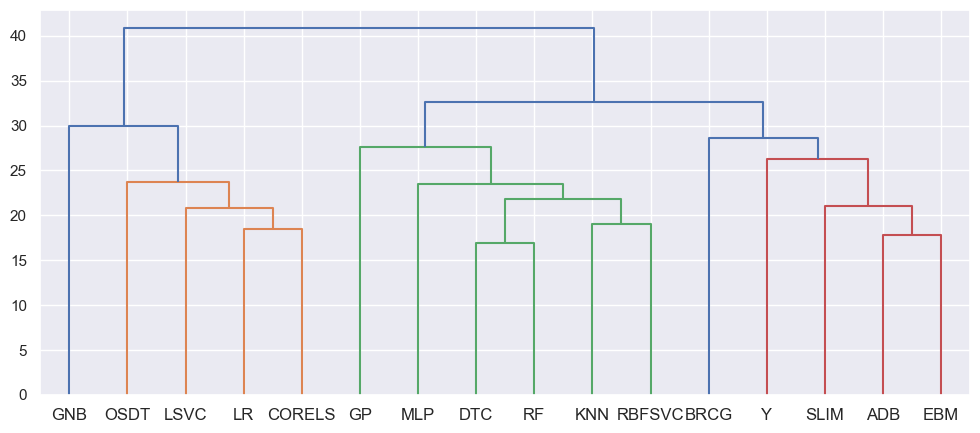

In [5]:
"""
    Figure 10 in the paper performing model comparison via hierarchical clustering by prediction.
    Models in the same cluster have similar predictions
    
    Parameters
    ----------
    Y_list : a list of tuples that consists of model names and model predictions
    export_file: option to save the current figure
    filename: file name to be specified to save the current figure
    ----------
    plot_dendrogram is from the following website: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
""" 
    
df=pd.read_csv('Magic_testdata_and_prediction.csv')
Ys = df.iloc[:, -16:]

Y_list=[]
for i in range(Ys.shape[1]):
    model_name=Ys.columns[i]
    predictions=Ys[model_name].to_numpy()
    acc = sum(Ys.iloc[:,0]==Ys.iloc[:,i])/(Ys.shape[0])
    Y=model_name, predictions, round(acc,2)
    Y_list.append(Y)

MC_hierarchical_tree(Y_list, figsize=(12,5), export_file=True, filename='MC_hierarchical_tree.png', dpi=300)

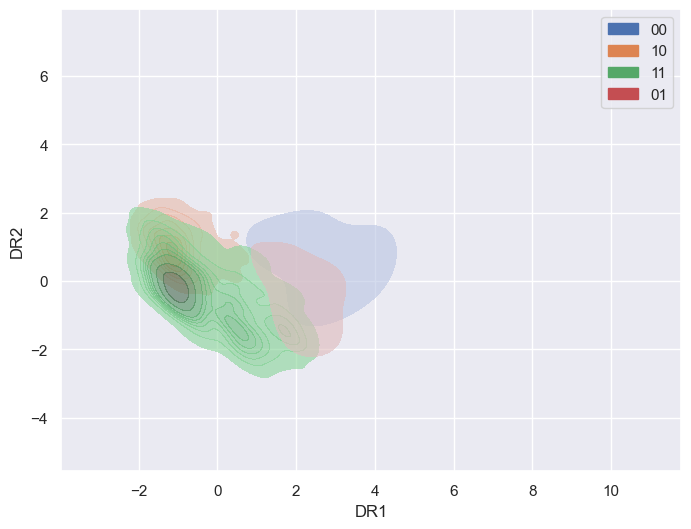

In [6]:
"""
    Figure 11 in the paper performing pairwise comparison from a list of classifiers via density plot.
    
    Parameters
    ----------
    X_DR : a reduced dimensionality data matrix X in 2D represented by a pandas dataframe of shape (n samples, 2)
    Y_list : a list of tuples that consists of model names and model predictions
    export_file: option to save the current figure
    filename: file name to be specified to save the current figure
"""
df=pd.read_csv('Magic_testdata_and_prediction.csv')
X = df.iloc[:, :-16]
Y = df.iloc[:, -16]
Y1='GNB', df['GNB'].to_numpy()
Y2='OSDT', df['OSDT'].to_numpy()
Y_list=[Y1,Y2]

X_st =  StandardScaler().fit_transform(X)
pca_scores = PCA(n_components=2).fit_transform(X_st)
X_DR=pd.DataFrame(pca_scores, columns=['DR1','DR2'])

MC_visual_density_plot(X_DR, Y_list, figsize=(8,6), export_file=True, 
                       filename='MC_visual_density_plot.png', alpha=0.6, dpi=300)

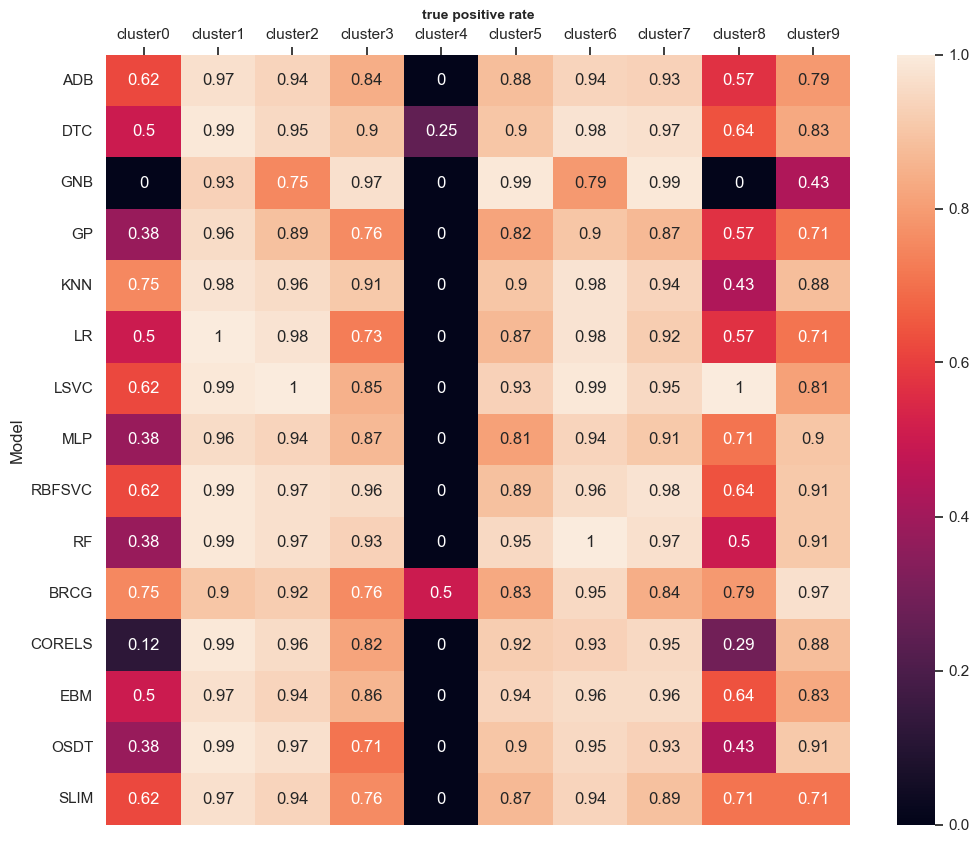

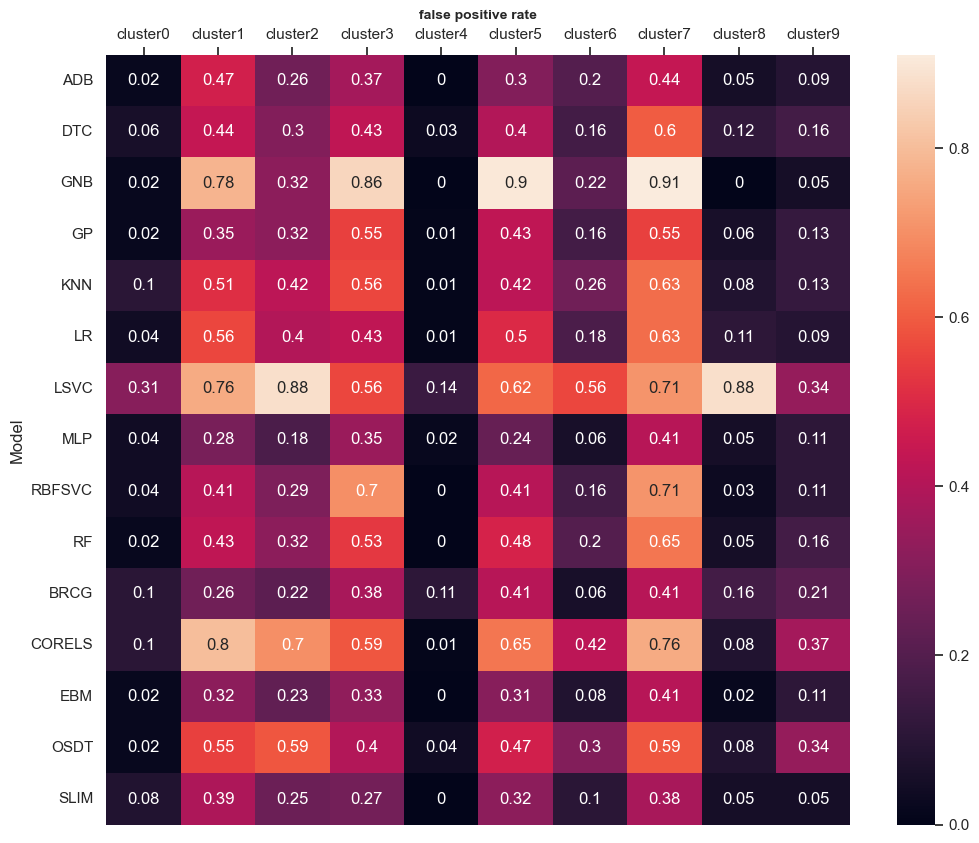

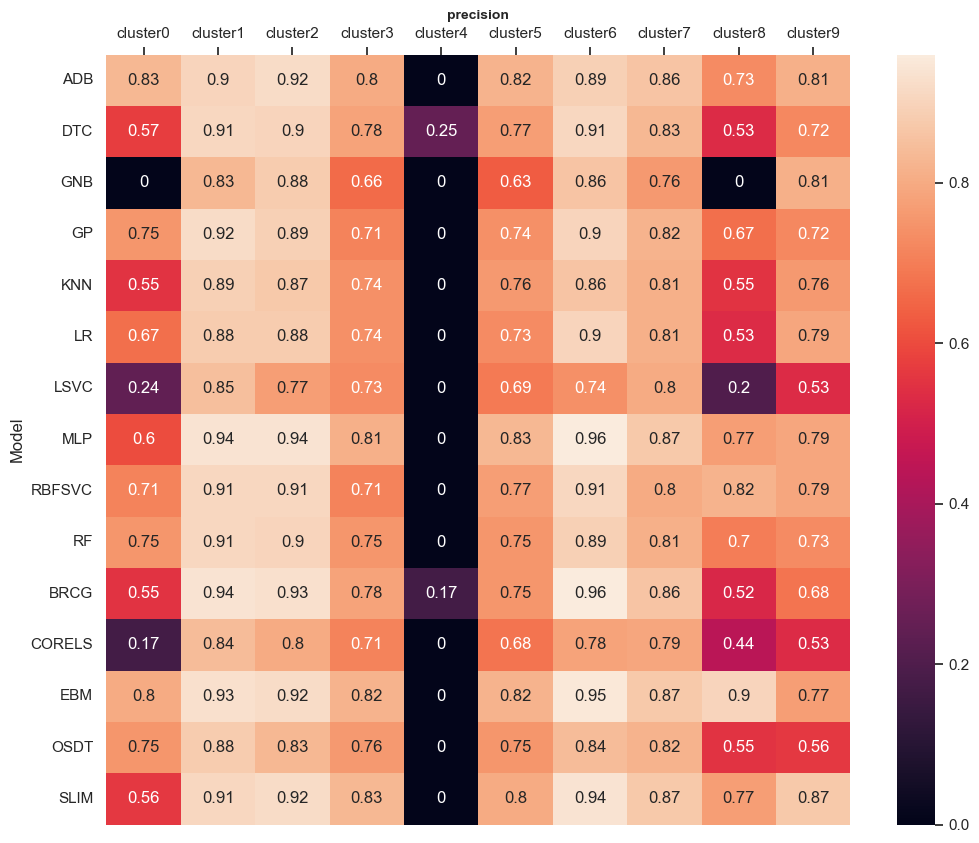

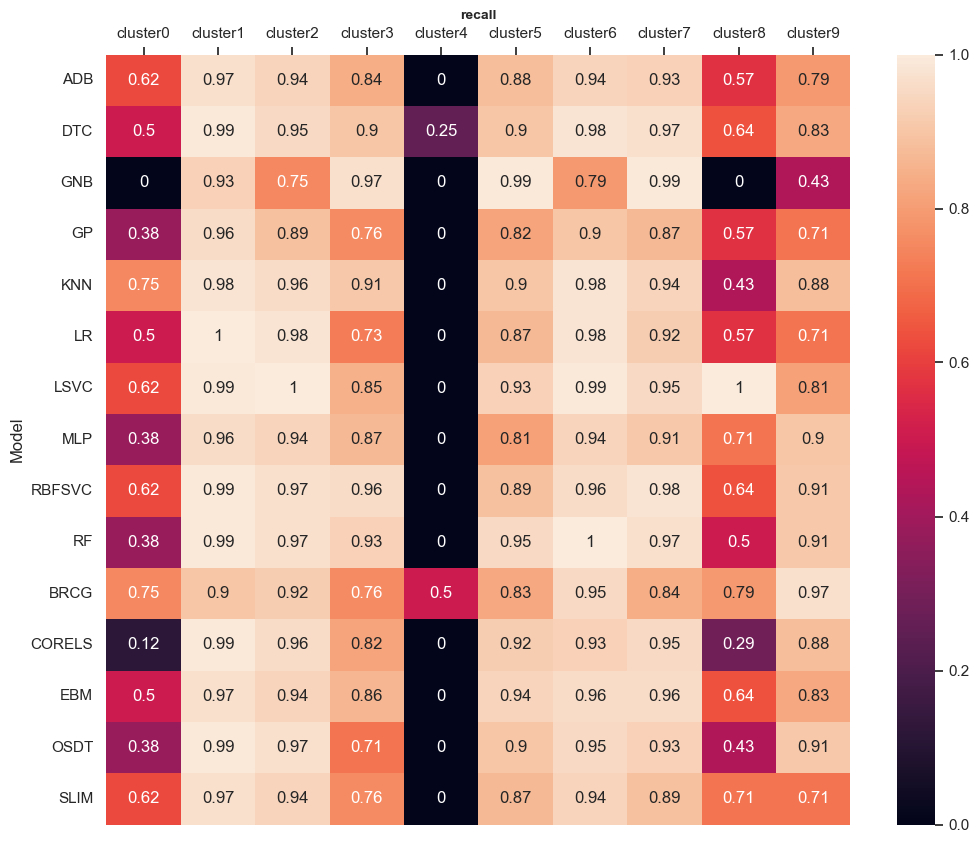

In [7]:
"""
    Figure 12 VCX in the paper for cluster analysis

    Parameters
    ----------
    X : a data matrix represented by a pandas dataframe of shape (n samples, p features)
    Y_list : a list of tuples that consists of model names and model predictions. The first tuple contains the true labels, while the subsequent tuples contain model predictions.
    models: a list that consists of model names in Y_list
    n_cl: number of clusters (default is 10)
    decimal: decimal of numbers shown in the heatmap
    export_file: option to save the current figure
    filename: file name to be specified to save the current figure
"""

df=pd.read_csv('Magic_testdata_and_prediction.csv')
X = df.iloc[:, :-16]
Ys = df.iloc[:, -16:]
models=df.iloc[:, -15:].columns.tolist()

Y_list=[]
for i in range(Ys.shape[1]):
    model_name=Ys.columns[i]
    predictions=Ys[model_name].to_numpy()
    Y=model_name, predictions
    Y_list.append(Y)

n_cl=10
MC_cluster_analysis(X, Y_list, models, n_cl=n_cl, decimal=2, figsize=(12,10), export_file=True, filename='MC_cluster_analysis.png', dpi=300)
    

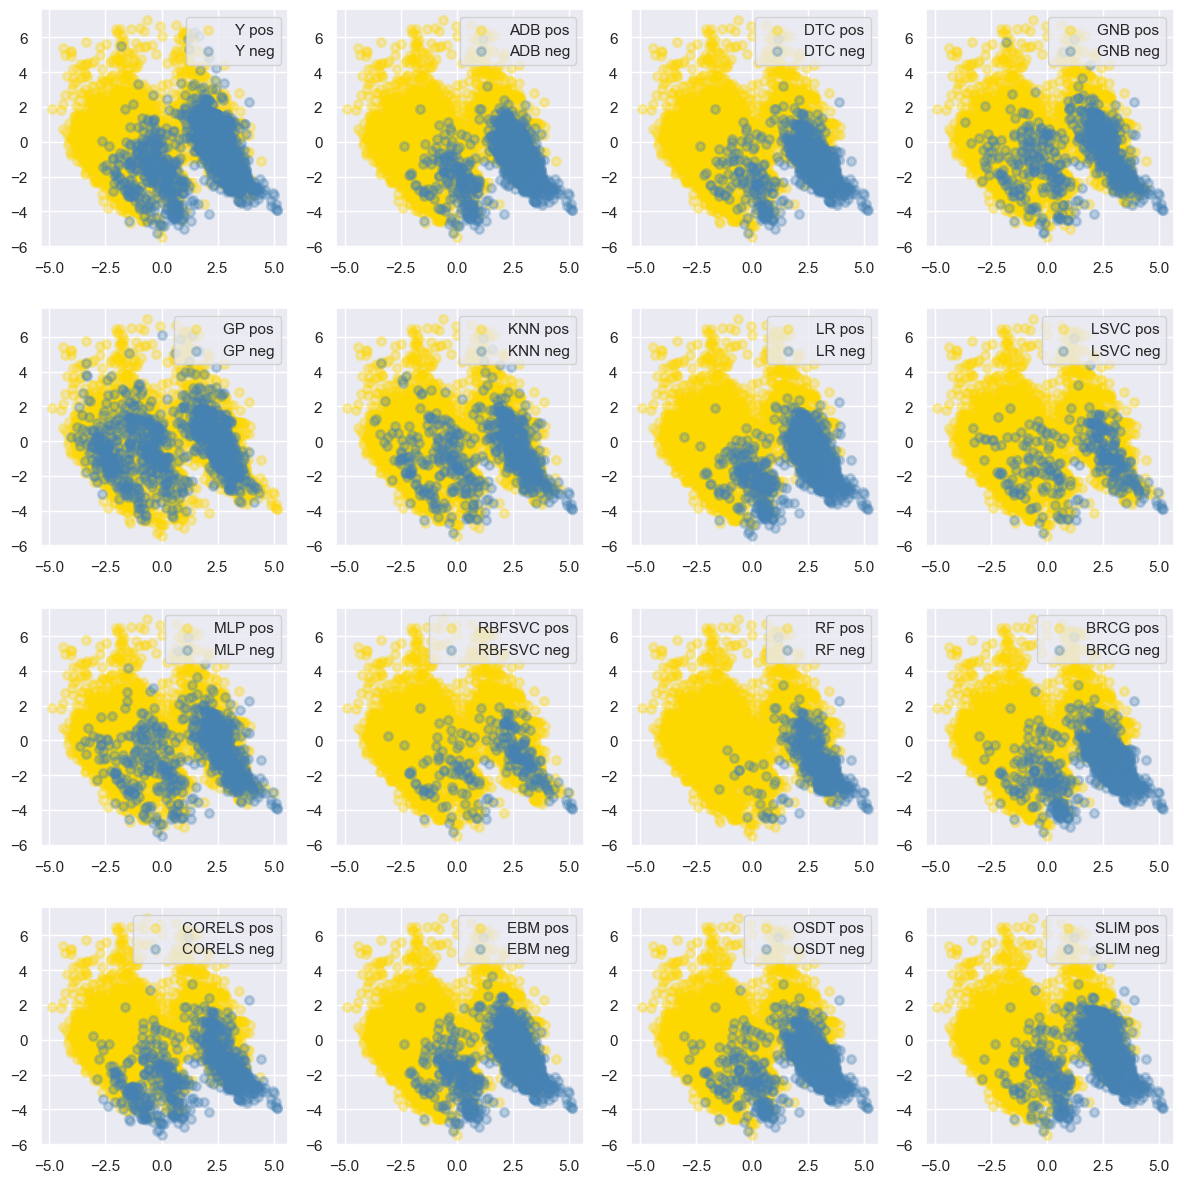

In [8]:
"""
    Figure 28 in the paper performing pairwise comparison from a list of classifiers by ploting models next to each other.
    The first subfigure shows the true y labels and serves as the baseline.
    Yellow markers represent observations with label (or prediction) 1
    Blue markers represent observations with label (or prediction) 0.
    
    Parameters
    ----------
    X_DR : a reduced dimensionality data matrix X in 2D represented by a pandas dataframe of shape (n samples, 2)
    Y_list : a list of tuples that consists of model names and model predictions. The first tuple contains the true labels, while the subsequent tuples contain model predictions.
    export_file: option to save the current figure
    filename: file name to be specified to save the current figure
""" 

df=pd.read_csv('Adult_testdata_and_prediction.csv')
X = df.iloc[:, :-16]
Ys = df.iloc[:, -16:]

Y_list=[]
for i in range(Ys.shape[1]):
    model_name=Ys.columns[i]
    predictions=Ys[model_name].to_numpy()
    Y=model_name, predictions
    Y_list.append(Y)

X_st =  StandardScaler().fit_transform(X)
pca_scores = PCA(n_components=2).fit_transform(X_st)
X_DR=pd.DataFrame(pca_scores, columns=['DR1','DR2'])

MC_simple_dr_comparison(X_DR, Y_list, figsize=(12,12), export_file=True, 
                        filename='MC_simple_dr_comparison.png', alpha=0.3, dpi=300)

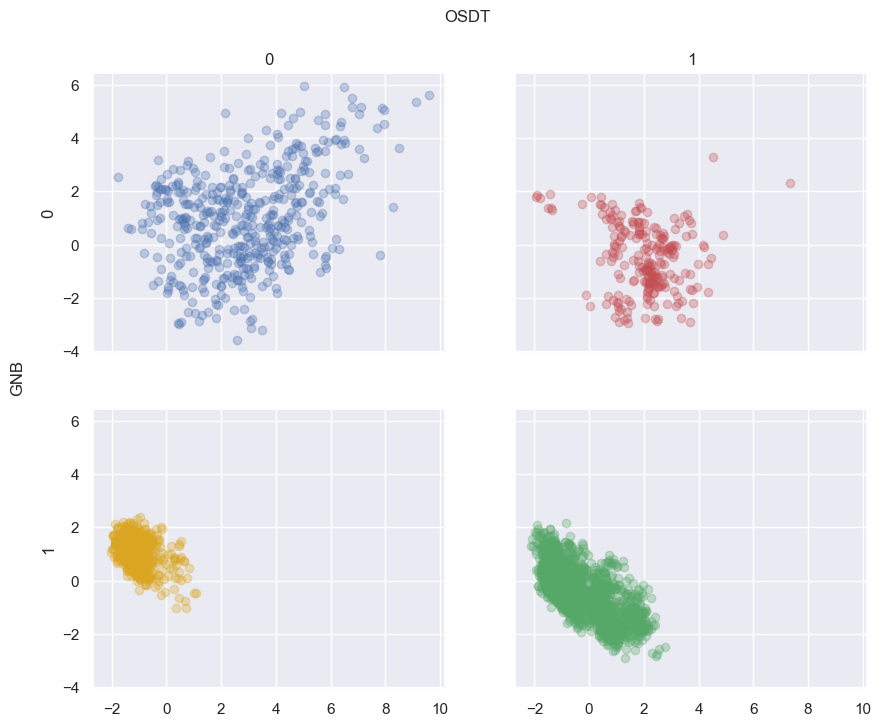

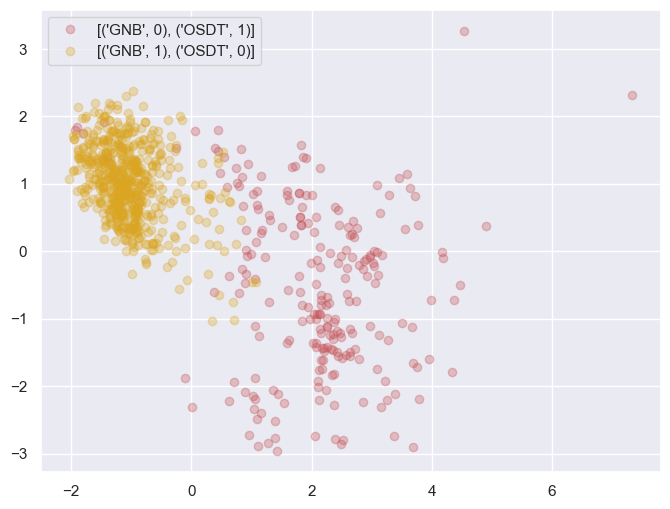

In [9]:
"""
    Figure 31 in the paper performing pairwise comparison from a list of classifiers via visual confusion matrix.

    Parameters
    ----------
    X_DR : a reduced dimensionality data matrix X in 2D represented by a pandas dataframe of shape (n samples, 2)
    Y_list : a list of tuples that consists of model names and model predictions
    export_file: option to save the current figure
    filename: file name to be specified to save the current figure
"""
df=pd.read_csv('Magic_testdata_and_prediction.csv')
X = df.iloc[:, :-16]
Y = df.iloc[:, -16]
Y1='GNB', df['GNB'].to_numpy()
Y2='OSDT', df['OSDT'].to_numpy()
Y_list=[Y1,Y2]

X_st =  StandardScaler().fit_transform(X)
pca_scores = PCA(n_components=2).fit_transform(X_st)
X_DR=pd.DataFrame(pca_scores, columns=['DR1','DR2'])

MC_visual_confusion_matrix(X_DR, Y_list, figsize1=(10,8), figsize2=(8,6), 
                           export_file=True, filename1='MC_visual_confusion_matrix.png', 
                           filename2='MC_visual_confusion_matrix2.png', alpha=0.3, dpi=300)

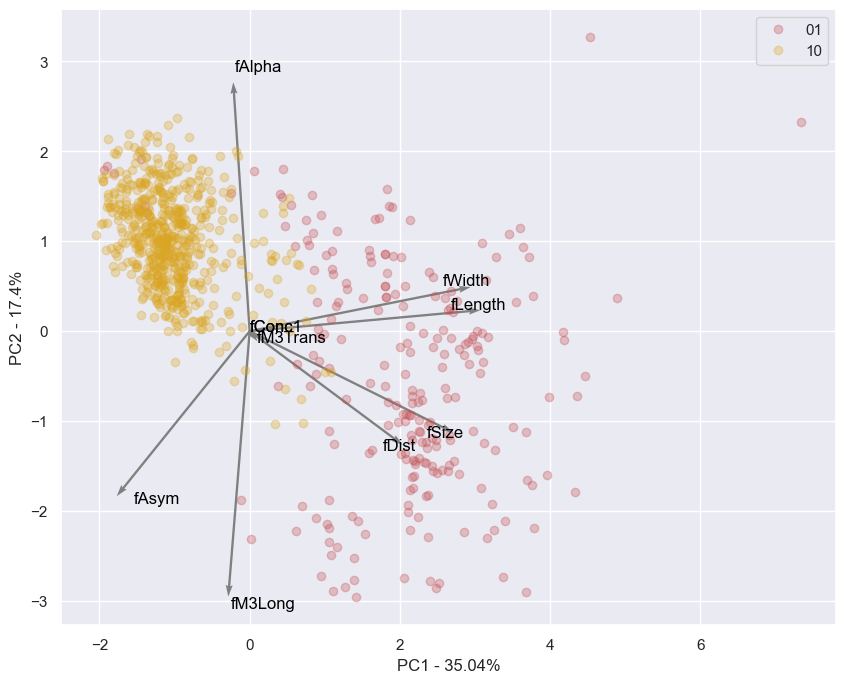

In [10]:
"""
    Figure 32 in the paper performing pairwise comparison from a list of classifiers via Biplot.
    
    Parameters
    ----------
    X_pca : a PCA-reduced dimensionality data matrix X in 2D represented by a pandas dataframe of shape (n samples, 2)
    pca_model: model of PCA
    Y_list : a list of tuples that consists of model names and model predictions
    features: features of the data matrix X
    export_file: option to save the current figure
    filename: file name to be specified to save the current figure
    ----------
"""
df=pd.read_csv('Magic_testdata_and_prediction.csv')
X = df.iloc[:, :-16]
Y = df.iloc[:, -16]
Y1='GNB', df['GNB'].to_numpy()
Y2='OSDT', df['OSDT'].to_numpy()
Y_list=[Y1,Y2]

features=X.columns.values

X_st =  StandardScaler().fit_transform(X)
pca_model = PCA(n_components=2).fit(X_st) #PCA().fit(X_st)
X_pca = PCA(n_components=2).fit_transform(X_st)

MC_biplot(X_pca, pca_model, Y_list, features, figsize=(10,8), export_file=False, filename=None, alpha=0.3, dpi=300)